# **Phase 1 Project**
This project use data cleaning, imputation, analysis and visualization to generate insights for potential aircraft business stakeholder.
The project starts by exploring the National Transportation Safety Board (NTSB) data set from Dataset. The data set contains information on incidents and accidents for civil aircraft over 6 decades. The project aim at using this data set to gain useful insights that will guid stakeholders decision as they pursue the aviation sector.

### **Goals and Objectives**

### Goal 1: Data exploration/cleaning
We will explore the dataset structure and essential variables. We will also address any missing data and aggregate data to deliver meaningful insights.

### Goal 2: Conduct Assessment and Risk Analysis
 We will explore the following variables including purpose_of_flight, craft_category, aircraft_damage,severity of injury, make and model and operation_conditions to identify the potential high risk factors.
 We will also peform a comparative analysis by comparing safety records of various aircraft types to determine which has had low risK profiles.
 ### Goal 2.1: Perform visualizations and insights
 The risk profiles of aircraft types will be analysed using barcharts to compare the frequency of accidents accross the various aircraft types.
 ### Goal 4: Recommendations

Three business recommendations will be made based on our analysis.

## Data exploration/cleaning
Import relevant libraries and open up the CSV file as dataframe.


In [13]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("AviationData.csv", encoding='latin-1') # opening the CSV file as dataframe
df.head() #understanding the data set

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [14]:
# Understanding the dataframe
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [15]:
# more information on data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29623 entries, 0 to 29622
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                29623 non-null  object 
 1   Investigation.Type      29623 non-null  object 
 2   Accident.Number         29623 non-null  object 
 3   Event.Date              29623 non-null  object 
 4   Location                29613 non-null  object 
 5   Country                 29482 non-null  object 
 6   Latitude                8 non-null      float64
 7   Longitude               8 non-null      float64
 8   Airport.Code            15658 non-null  object 
 9   Airport.Name            17379 non-null  object 
 10  Injury.Severity         29623 non-null  object 
 11  Aircraft.damage         28978 non-null  object 
 12  Aircraft.Category       3665 non-null   object 
 13  Registration.Number     29612 non-null  object 
 14  Make                    29616 non-null

In [16]:
# Filtering out the relevant columns
relevant_columns = ['Aircraft.damage', 'Injury.Severity','Aircraft.Category',
                    'Number.of.Engines','Engine.Type','Model','Make','Purpose.of.flight',
                    'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
df.filter(items=relevant_columns)

,Aircraft.damage,Injury.Severity,Aircraft.Category,Number.of.Engines,Engine.Type,Model,Make,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Destroyed,Fatal(2),NaN,1.0,Reciprocating,108-3,Stinson,Personal,2.0,0.0,0.0,0.0
1,Destroyed,Fatal(4),NaN,1.0,Reciprocating,PA24-180,Piper,Personal,4.0,0.0,0.0,0.0
2,Destroyed,Fatal(3),NaN,1.0,Reciprocating,172M,Cessna,Personal,3.0,NaN,NaN,NaN
3,Destroyed,Fatal(2),NaN,1.0,Reciprocating,112,Rockwell,Personal,2.0,0.0,0.0,0.0
4,Destroyed,Fatal(1),NaN,NaN,NaN,501,Cessna,Personal,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29618,Substantial,Non-Fatal,NaN,1.0,Reciprocating,172N,Cessna,Personal,0.0,0.0,0.0,2.0
29619,Substantial,Non-Fatal,NaN,1.0,Reciprocating,PA-18-150,Piper,Public Aircraft,0.0,0.0,0.0,1.0
29620,Destroyed,Fatal(2),Airplane,2.0,Reciprocating,58P,Beech,Business,2.0,NaN,NaN,NaN
29621,Substantial,Non-Fatal,NaN,1.0,Reciprocating,150G,Cessna,Personal,0.0,0.0,0.0,1.0


In [17]:
# Addressing missing values
df.loc[:, relevant_columns].isna().sum()

Aircraft.damage             645
Injury.Severity               0
Aircraft.Category         25958
Number.of.Engines           332
Engine.Type                   4
Model                        17
Make                          7
Purpose.of.flight            44
Total.Fatal.Injuries        145
Total.Serious.Injuries      191
Total.Minor.Injuries        195
Total.Uninjured             127
dtype: int64

In [18]:
# prompt: address missing values using mode

for column in relevant_columns:
  if df[column].isna().any():
    df[column] = df[column].fillna(df[column].mode()[0])


## 2. Conduct Assessment and Risk Analysis
Identify the best type/model of business based on the analysis of the purpose of flight

In [19]:
# Analysis of purpose of flight
df['Purpose.of.flight'].value_counts()


Purpose.of.flight
Personal               16757
Unknown                 3608
Instructional           3497
Business                2150
Aerial Application      1847
Ferry                    404
Positioning              372
Other Work Use           342
Executive/corporate      256
Aerial Observation       212
Public Aircraft          164
Skydiving                 14
Name: count, dtype: int64

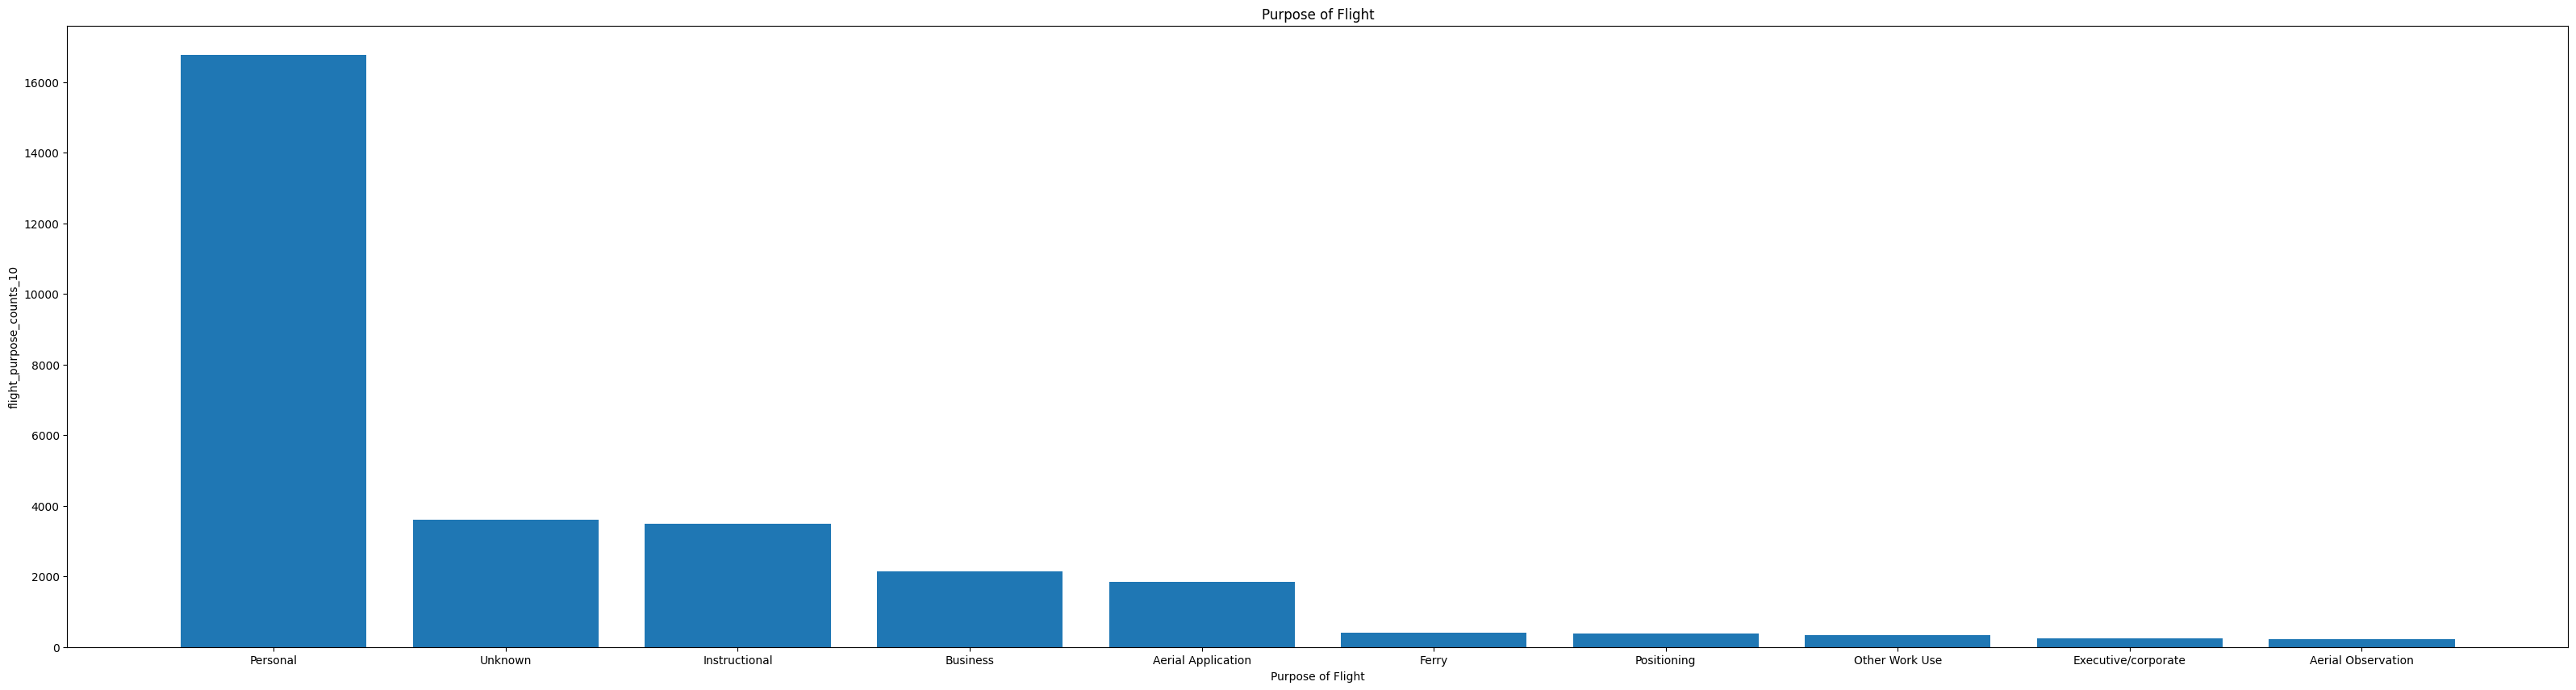

In [20]:
# Plotting the best 10 purpose of flight for visualization
fig, ax = plt.subplots(figsize=(40,10))

flight_purpose_counts_10 = df['Purpose.of.flight'].value_counts().head(10)

# plot data
ax.bar(flight_purpose_counts_10.index, flight_purpose_counts_10)

# customizing appearance
ax.set_xlabel("Purpose of Flight")
ax.set_ylabel("flight_purpose_counts_10")
ax.set_title("Purpose of Flight")

plt.show()

The most popular purpose of flights for personal reasons

## 3. Risk Analyses
 We analyze the accident risk by air craft damage, engine type, aircraft make, aircraft model, and total injuries(severe, minor, uninjured) to determine the best aircraft make, model, and engine type to run the business
 ## 4. Visualizations
 The above analysis performed using relevant libraries for visual presentation.

<ipython-input-24-4eef4d97bb98>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_Enginetype_top10['Aircraft.damage'] = df_selected_Enginetype_top10['Aircraft.damage'].map(damage_mapping)


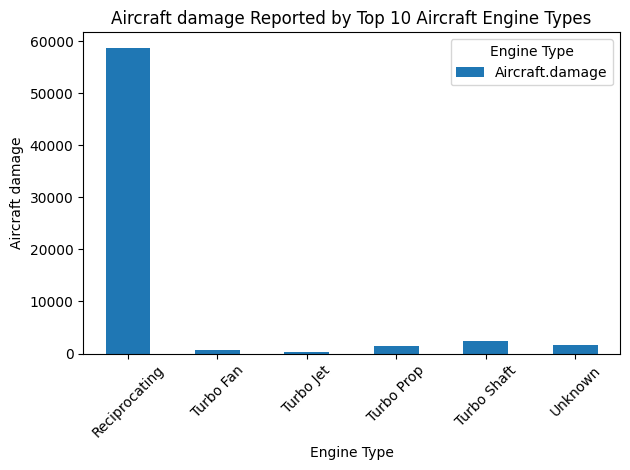

In [24]:
# Analysis of aircraft damage by type of engine
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('AviationData.csv')


# Selecting the relevant columns and filtering for the top 10 aircraft engine types
AirCraft_Make_top10 = df['Engine.Type'].value_counts().head(10)
df_selected_Enginetype_top10 = df[df['Engine.Type'].isin(AirCraft_Make_top10.index)]

# Columns for injuries reported
AirCraft_damage = ['Aircraft.damage']

# Convert 'Aircraft.damage' to numeric values for plotting
damage_mapping = {'Destroyed': 3, 'Substantial': 2, 'Minor': 1, 'Significant': 0}
df_selected_Enginetype_top10['Aircraft.damage'] = df_selected_Enginetype_top10['Aircraft.damage'].map(damage_mapping)

# Summing up injuries for each aircraft make
grouped_data_1 = df_selected_Enginetype_top10.groupby('Engine.Type')['Aircraft.damage'].sum()

# Plotting the bar chart
grouped_data.plot(kind='bar', stacked=True) # Removed the color argument since it's no longer needed

#customizing plot

plt.xlabel('Engine Type')
plt.ylabel('Aircraft damage')
plt.title('Aircraft damage Reported by Top 10 Aircraft Engine Types')
plt.xticks(rotation=45)
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()


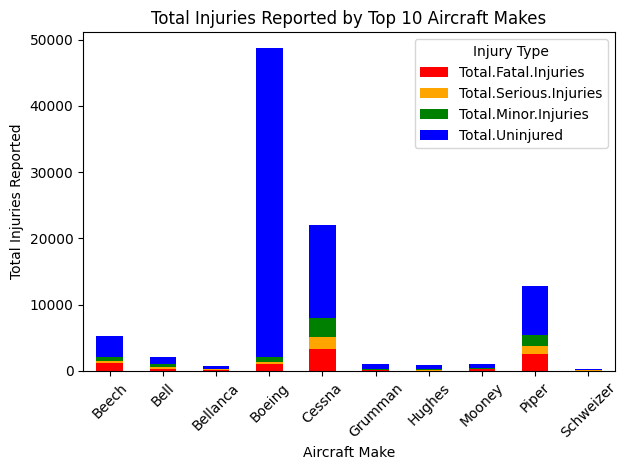

In [26]:
# Analysis of aircraft accidents severity by aircraft make

import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('AviationData.csv')

# Selecting the relevant columns and filtering for the top 10 aircraft makes
AirCraft_Make_top10 = df['Make'].value_counts().head(10)
df_selected_top10 = df[df['Make'].isin(AirCraft_Make_top10.index)]

# Columns for injuries reported
injuries_reported = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries','Total.Uninjured']

# Summing up injuries for each aircraft make
grouped_data_2 = df_selected_top10.groupby('Make')[injuries_reported].sum()

# Plotting the bar chart
# Define colors for each type of injury
colors = {
    'Total.Fatal.Injuries': 'red',
    'Total.Serious.Injuries': 'orange',
    'Total.Minor.Injuries': 'green',
    'Total.Uninjured': 'blue'
}

# Plot the stacked bar chart, mapping colors to the corresponding columns
grouped_data_2.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_data_2.columns]) # Map colors to columns

#customizing plot

plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries Reported')
plt.title('Total Injuries Reported by Top 10 Aircraft Makes')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()

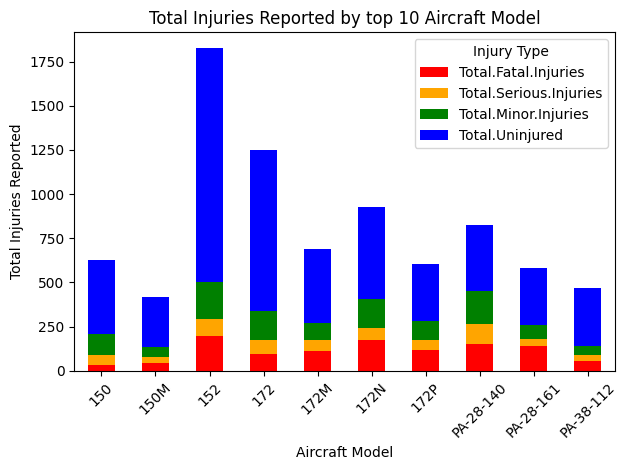

In [28]:
# Analysis of aircraft accidents severity by aircraft model
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('AviationData.csv')
# Selecting the relevant columns and filtering for the top 10 aircraft model
AirCraft_Model_top10 = df['Model'].value_counts().head(10)
df_selected_top10 = df[df['Model'].isin(AirCraft_Model_top10.index)]

# Columns for injuries reported
injuries_reported = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries','Total.Uninjured']

# Summing up injuries for each aircraft model
grouped_data_3 = df_selected_top10.groupby('Model')[injuries_reported].sum()

# Plotting the bar chart
# Define colors for each type of injury
colors = {
    'Total.Fatal.Injuries': 'red',
    'Total.Serious.Injuries': 'orange',
    'Total.Minor.Injuries': 'green',
    'Total.Uninjured': 'blue'
}
grouped_data_3.plot(kind='bar', stacked=True, color=colors)

#customizing plot

plt.xlabel('Aircraft Model')
plt.ylabel('Total Injuries Reported')
plt.title('Total Injuries Reported by top 10 Aircraft Model')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()


## 4. Recommendation

In [40]:
# prompt: the most popular purpose of flight, the best 3 aircraft commercial make based on total uninjured, the best 3 commercial aircraft model based on total uninjured, the best aircraft engine

# Most popular purpose of flight
most_popular_purpose = df['Purpose.of.flight'].value_counts().index[0]
print(f"Most popular purpose of flight: {most_popular_purpose}")

# Best 3 aircraft commercial make based on total uninjured
best_make_uninjured = df.groupby('Make')['Total.Uninjured'].sum().sort_values(ascending=False).head(3).index.to_list()
print(f"Best 3 aircraft commercial make based on total uninjured: {best_make_uninjured}")

# Best 3 commercial aircraft model based on total uninjured
best_model_uninjured = df.groupby('Model')['Total.Uninjured'].sum().sort_values(ascending=False).head(3).index.to_list()
print(f"Best 3 commercial aircraft model based on total uninjured: {best_model_uninjured}")

# Best aircraft engine
best_engine = df.groupby('Engine.Type')['Total.Uninjured'].sum().sort_values(ascending=False).index[0]
print(f"Best aircraft engine: {best_engine}")


Most popular purpose of flight: Personal
Best 3 aircraft commercial make based on total uninjured: ['Boeing', 'Mcdonnell Douglas', 'Cessna']
Best 3 commercial aircraft model based on total uninjured: ['DC-10-10', '727-200', 'DC-10-30']
Best aircraft engine: Turbo Fan
